## NeXLParticle

This example shows how to use NeXLParticle and the 'Zeppelin' struct to load Zeppelin particle data sets and access the tabular, image and spectral data.

In [1]:
using Revise
using NeXLParticle
using NeXLSpectrum
using Gadfly
using DataFrames
using Images

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly C:\Users\nritchie\.julia\packages\Gadfly\09PWZ\src\mapping.jl:228
┌ Info: Loading NeXLSpectrum Gadfly support
└ @ NeXLSpectrum C:\Users\nritchie\.julia\dev\NeXLSpectrum\src\gadflysupport.jl:328


In [2]:
zep=Zeppelin("Zeppelin\\test.hdz")

Zeppelin[Zeppelin\test.hdz,(250, 98)]

In [3]:
ENV["columns"]=240
zep.data[1:10, [:NUMBER, :DAVG, :CLASSNAME, :FIRSTELM, :FIRSTPCT, :SECONDELM, :SECONDPCT, :THIRDELM, :THIRDPCT, :FOURTHELM, :FOURTHPCT ]]

,NUMBER,DAVG,CLASSNAME,FIRSTELM,FIRSTPCT,SECONDELM,SECONDPCT,THIRDELM,THIRDPCT,FOURTHELM,FOURTHPCT
,Int64,Float64,Categorical…,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64
1,1,1.83843,Iron-80,26,89.7652,8,39.3747,16,5.07137,14,2.1913
2,2,2.98486,Iron-60,8,74.331,26,60.0366,16,27.0303,15,8.96148
3,3,3.26079,Iron-90,26,95.6806,8,35.7823,16,3.39061,17,0.479296
4,4,3.50613,Calcite,20,89.9618,8,33.4914,14,5.39432,19,1.38043
5,5,2.39501,Iron-90,26,96.5634,8,36.367,16,1.70483,14,1.40178
6,6,3.59721,Iron-90,26,94.2262,8,36.4597,14,3.21033,16,1.34868
7,7,2.73491,Iron-60,26,65.0184,8,35.9561,56,12.6194,16,7.09004
8,8,1.20893,Iron-80,26,83.6919,8,37.1902,16,6.01653,30,3.89939
9,9,2.75471,Ba+S,8,71.3241,56,41.7317,16,30.5127,26,22.0047


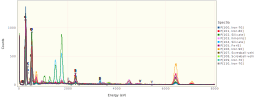

In [4]:
set_default_plot_size(10inch,4inch)
s=zep[103]
imgs = s[:Image]
plot(zep, 100:110, xmax=0.8e4)

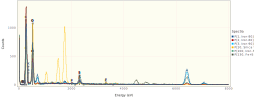

In [19]:
plot(zep, [1,2,3,10,100,130], xmax=0.8e4, palette=NeXLCore.NeXLColorblind)

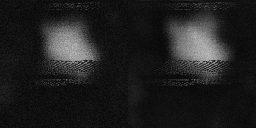

In [6]:
[imgs[:,:,1] imgs[:,:,2]]

In [7]:
s[:StagePosition]

Dict{Symbol,Float64} with 5 entries:
  :Z => 2.50081
  :T => -0.0
  :R => -0.0
  :X => -1.38824
  :Y => 0.81837

In [8]:
elms = ( n"Ag", n"Al", n"Ba", n"Bi", n"Br", n"C", n"Ca", n"Ce", n"Cl", n"Co", n"Cr", n"Cu", n"F", n"Fe", n"K", n"Mg", n"Mn", n"Na", n"Nd", n"Ni", 
    n"O", n"P", n"Pb", n"S", n"Sb", n"Si", n"Sn", n"Sr", n"Ti", n"V", n"W", n"Zn", n"Zr" )
refs = Dict{Element,Spectrum}( elm => readEMSA("Zeppelin\\Standards\\$(elm.symbol) std.msa") for elm in elms);

In [9]:
det = matching(refs[n"Fe"],132.0)

EDS[4096 channels, E[ch] = 1.63032 + 9.99856⋅ch, 132.0 eV @ Mn Kα]

In [16]:
NeXLParticle.quantify(zep, det, refs, withUncertainty=false)
@time res=NeXLParticle.quantify(zep, det, refs, withUncertainty=false);

  9.130828 seconds (52.98 M allocations: 5.353 GiB, 12.21% gc time)


In [11]:
ENV["columns"]=500
res[102:122,1:40]

,FIRSTELM,FIRSTPCT,SECONDELM,SECONDPCT,THIRDELM,THIRDPCT,FOURTHELM,FOURTHPCT,C,O,F,NA,MG,AL,SI,P,S,CL,K,CA,TI,V,CR,MN,FE,CO,NI,CU,ZN,BR,SR,ZR,AG,SN,SB,BA,CE,ND,W,PB
,Element⍰,Float64,Element⍰,Float64,Element⍰,Float64,Element⍰,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Element(Carbon),54.1578,Element(Oxygen),20.5096,Element(Silicon),11.2499,Element(Iron),4.07538,54.1578,20.5096,0.0,1.43404,1.20994,3.87398,11.2499,0.0,0.370003,0.0842797,0.151957,0.277682,0.0,0.0544806,0.0,0.0,4.07538,0.0,0.0,0.223303,0.151168,0.0,1.21138,0.0,0.0,0.329705,0.225631,0.0,0.0,0.0,0.0,0.409701
2,Element(Carbon),61.0771,Element(Iron),14.2575,Element(Oxygen),13.4589,Element(Copper),2.48774,61.0771,13.4589,0.0,0.0,0.0,0.327686,0.866609,0.0,1.08211,0.0,0.331677,0.257944,2.3978,0.0,0.147312,0.0,14.2575,0.0,0.0,2.48774,0.352023,0.0,0.0,0.192644,0.0,0.0,0.225005,2.24369,0.0,0.0,0.294339,0.0
3,Element(Carbon),59.0094,Element(Oxygen),18.4748,Element(Silicon),8.48477,Element(Aluminium),5.91035,59.0094,18.4748,0.0,0.117023,0.501659,5.91035,8.48477,0.0,0.365599,0.0806219,1.85072,0.403756,0.415936,0.0,0.0,0.0,2.12223,0.0,0.203707,0.45646,0.0,0.847056,0.0,0.211774,0.284532,0.259619,0.0,0.0,0.0,0.0,0.0,0.0
4,Element(Carbon),61.304,Element(Oxygen),15.2252,Element(Iron),9.16688,Element(Barium),2.90514,61.304,15.2252,0.0,0.070864,0.145242,0.228479,0.523375,0.0,2.51343,0.0,0.137005,0.341888,0.716982,0.0627875,0.0710455,0.0958958,9.16688,0.217118,0.091359,1.13896,0.695281,0.0,0.0,1.81551,0.0,1.51178,0.0,2.90514,0.155166,0.0,0.243246,0.623444
5,Element(Carbon),54.0926,Element(Iron),27.5624,Element(Oxygen),14.4954,Element(Bismuth),1.17617,54.0926,14.4954,0.0,0.0,0.0,0.0,0.127934,0.0766651,0.221372,0.0,0.0,0.0,0.064855,0.0,0.0,0.102555,27.5624,0.0,0.0,0.222372,0.0874717,0.348836,0.0,0.0,0.125213,0.0,0.0,0.0,0.0,0.189462,0.0,1.10661
6,Element(Carbon),68.9855,Element(Oxygen),11.8851,Element(Barium),3.79239,Element(Iron),3.53702,68.9855,11.8851,0.0,0.098985,0.186572,0.0,0.589823,0.0,1.86404,0.0493509,0.407938,0.0744349,1.34206,0.227927,0.107584,0.0,3.53702,0.0,0.0757425,1.24847,0.0,0.537679,2.91498,1.59631,0.0,0.0,0.344955,3.79239,0.133178,0.0,0.0,0.0
7,Element(Carbon),63.2836,Element(Oxygen),13.6709,Element(Iron),8.25098,Element(Barium),3.32661,63.2836,13.6709,0.0,0.0,0.0438249,0.327813,0.850978,0.0,2.3091,0.0614467,0.219735,0.927909,1.92078,0.201154,0.0887249,0.0,8.25098,0.0,0.0,1.90097,0.184311,0.340422,0.0,0.302926,0.144792,0.0,1.42055,3.32661,0.0,0.0,0.222497,0.0
8,Element(Carbon),65.8515,Element(Oxygen),13.0792,Element(Iron),12.1317,Element(Sulfur),2.2247,65.8515,13.0792,0.0,0.0987684,0.0720009,0.0850285,0.338941,0.0,2.2247,0.0,0.209364,0.225625,0.0677556,0.0,0.0,0.0517918,12.1317,0.214367,0.0,0.44477,0.0,0.0,0.962196,0.0,0.0,0.289718,0.201551,0.803927,0.216977,0.228254,0.0,1.08795
9,Element(Carbon),72.0435,Element(Iron),11.2033,Element(Oxygen),11.0178,Element(Barium),1.86029,72.0435,11.0178,0.0,0.0,0.0454565,0.135206,0.695293,0.0,0.982767,0.0,0.0626514,0.304917,0.0,0.0,0.0,0.0,11.2033,0.271282,0.0,0.233838,0.0,0.0,0.0,0.0,0.0,0.213363,0.0,1.86029,0.0,0.168038,0.0,0.0


In [12]:
describe(res[:,9:2:end])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,C,57.8455,18.9255,59.3859,93.3422,,,Float64
2,F,0.00734674,0.0,0.0,0.576575,,,Float64
3,MG,0.577308,0.0,0.102426,13.3917,,,Float64
4,SI,3.6305,0.0,0.692453,41.8539,,,Float64
5,S,1.10047,0.0854782,0.736217,19.4647,,,Float64
6,K,0.431278,0.0,0.140978,7.516,,,Float64
7,TI,0.551265,0.0,0.0,48.0339,,,Float64
8,CR,0.124995,0.0,0.0,20.5622,,,Float64
9,FE,11.3707,0.0,8.40348,53.5415,,,Float64


Things to add
  - Plot multiple rows from a zep
  - Add image scales
  - Add multi-images to left of plot
  - Row filters
  - Columns sorting

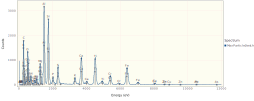

In [13]:
plot(NeXLParticle.maxparticle(zep), xmin = 0.0, xmax=12000.0, klms=[ n"C", n"O", n"Mg", n"Al", n"Si", n"Ca", n"Ti", n"Cr", n"Fe", n"Na", n"S", n"P", n"K", n"Zn", n"Cu", n"As"  ])

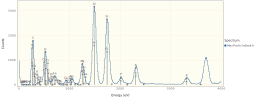

In [14]:
plot(NeXLParticle.maxparticle(zep), xmin = 0.0, xmax=4000.0, klms=[ n"C", n"O", n"Mg", n"Al", n"Si", n"Ca", n"Ti", n"Cr", n"Fe", n"Na", n"S", n"P", n"K", n"Zn", n"Cu", n"As"  ])

In [15]:
@time NeXLParticle.maxparticle(zep);

  1.160006 seconds (10.62 M allocations: 203.666 MiB, 2.80% gc time)
